In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
target = pd.read_csv('target_lec.csv', parse_dates=['timestamp'])
data = pd.read_csv('data_lec.csv', parse_dates=['timestamp'])

print("Target Dataset Info:")
print(target.info())
print(target.describe())

print("\nData Dataset Info:")
print(data.info())
print(data.describe())

# Проверка на пропуски
print("\nMissing Values in Target:")
print(target.isnull().sum())

print("\nMissing Values in Data:")
print(data.isnull().sum())

print("\nTarget Dataset Head:")
print(target.head())

print("\nData Dataset Head:")
print(data.head())

# Проверка временных диапазонов
print("\nTarget Timestamp Range:", target['timestamp'].min(), "-", target['timestamp'].max())
print("Data Timestamp Range:", data['timestamp'].min(), "-", data['timestamp'].max())


Target Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  158 non-null    datetime64[ns, UTC]
 1   target     158 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 2.6 KB
None
           target
count  158.000000
mean     1.508666
std      0.932205
min      0.230840
25%      0.876232
50%      1.269050
75%      2.023938
max      7.309020

Data Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81255 entries, 0 to 81254
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Unnamed: 0              81255 non-null  int64              
 1   timestamp               81255 non-null  datetime64[ns, UTC]
 2   ppm1                    80284 non-null  fl

In [7]:
target = pd.read_csv('target_lec.csv', parse_dates=['timestamp'])
data = pd.read_csv('data_lec.csv', parse_dates=['timestamp'])

data['timestamp'] = pd.to_datetime(data['timestamp'])
target['timestamp'] = pd.to_datetime(target['timestamp'])

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Синхронизация timestamps
merged = pd.merge_asof(data.sort_values('timestamp'),
                       target.sort_values('timestamp'),
                       on='timestamp',
                       direction='backward')

print("\nMissing Values in Merged Data:")
print(merged.isnull().sum())

print("\nMerged Data Head:")
print(merged.head())





Missing Values in Merged Data:
Unnamed: 0                   0
timestamp                    0
ppm1                         0
temp1                        0
temp2                        0
ppm2                         0
gas_opening1                 0
press1                       0
rotationspeed1               0
press3                       0
temp3                        0
press2                       0
press4                       0
temp4                        0
electric_ampere1             0
speed1                       0
press5                       0
electric_consumption2        0
press6                       0
speed2                       0
electric_consumption3        0
inlet_pressure1              0
press7                       0
gas_consumption1             0
press8                       0
press9                       0
electric_consumption4        0
electric_consumption5        0
press10                      0
sito1                        0
moisture1                    0
ALM1   

<ipython-input-7-0199c6578b4f>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Заполнение вперёд
<ipython-input-7-0199c6578b4f>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Заполнение назад


In [8]:
print("Колонки в merged:")
print(merged.columns)

print("\nПервые строки merged:")
print(merged.head())


Колонки в merged:
Index(['Unnamed: 0', 'timestamp', 'ppm1', 'temp1', 'temp2', 'ppm2',
       'gas_opening1', 'press1', 'rotationspeed1', 'press3', 'temp3', 'press2',
       'press4', 'temp4', 'electric_ampere1', 'speed1', 'press5',
       'electric_consumption2', 'press6', 'speed2', 'electric_consumption3',
       'inlet_pressure1', 'press7', 'gas_consumption1', 'press8', 'press9',
       'electric_consumption4', 'electric_consumption5', 'press10', 'sito1',
       'moisture1', 'ALM1', 'CaO1', 'SIM1', 'LSF1', 'sito2', 'moisture2',
       'ALM2', 'CaO2', 'SIM2', 'LSF2', 'electric_ampere2', 'electric_ampere3',
       'temp5', 'target_x', 'target_ffill', 'electric_ampere_delta1',
       'coeffs_current1', 'coeffs_temp1', 'target_y'],
      dtype='object')

Первые строки merged:
   Unnamed: 0                 timestamp        ppm1       temp1       temp2  \
0           0 2023-09-04 05:01:00+00:00  113.535957  767.616089  301.616760   
1           1 2023-09-04 05:02:00+00:00  113.535957  767.

<ipython-input-13-4f3c8d2b4a53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.rename(columns={'target_y': 'target'}, inplace=True)


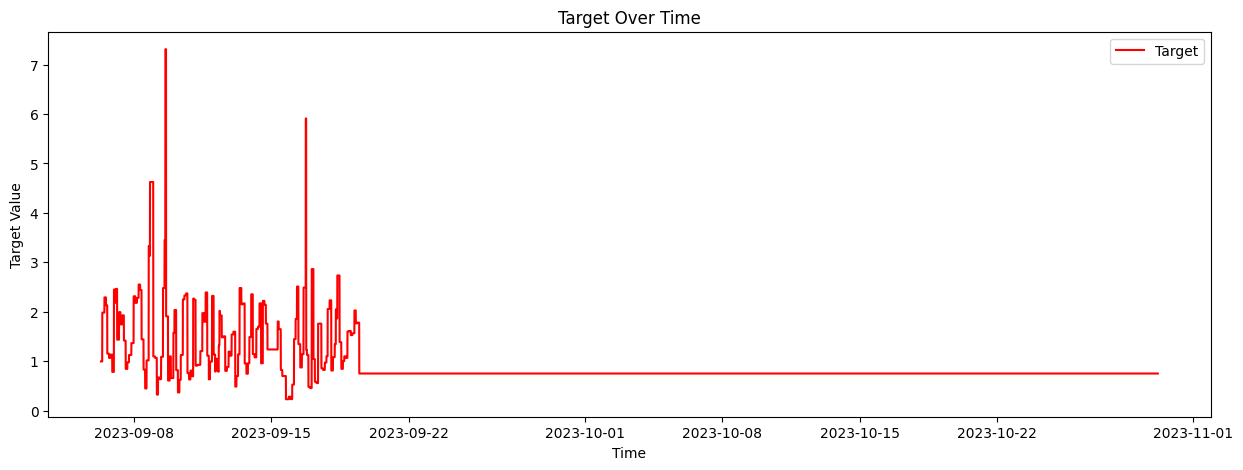


Missing Values in Merged Data after Cleaning:
Unnamed: 0                0
timestamp                 0
ppm1                      0
temp1                     0
temp2                     0
ppm2                      0
gas_opening1              0
press1                    0
rotationspeed1            0
press3                    0
temp3                     0
press2                    0
press4                    0
temp4                     0
electric_ampere1          0
speed1                    0
press5                    0
electric_consumption2     0
press6                    0
speed2                    0
electric_consumption3     0
inlet_pressure1           0
press7                    0
gas_consumption1          0
press8                    0
press9                    0
electric_consumption4     0
electric_consumption5     0
press10                   0
sito1                     0
moisture1                 0
ALM1                      0
CaO1                      0
SIM1                      0
L

In [13]:
merged = merged.dropna(subset=['target_y'])

merged.rename(columns={'target_y': 'target'}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(merged['timestamp'], merged['target'], label='Target', color='red')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Target Over Time')
plt.legend()
plt.show()

print("\nMissing Values in Merged Data after Cleaning:")
print(merged.isnull().sum())

print("\nMerged Data Info after Cleaning:")
print(merged.info())


Топ 10 признаков по корреляции с target:
target              1.000000
ALM2                0.190032
ALM1                0.189928
temp3               0.163290
SIM1                0.145712
temp1               0.131411
SIM2                0.129597
electric_ampere2    0.114106
press7              0.111962
CaO2                0.109302
Name: target, dtype: float64


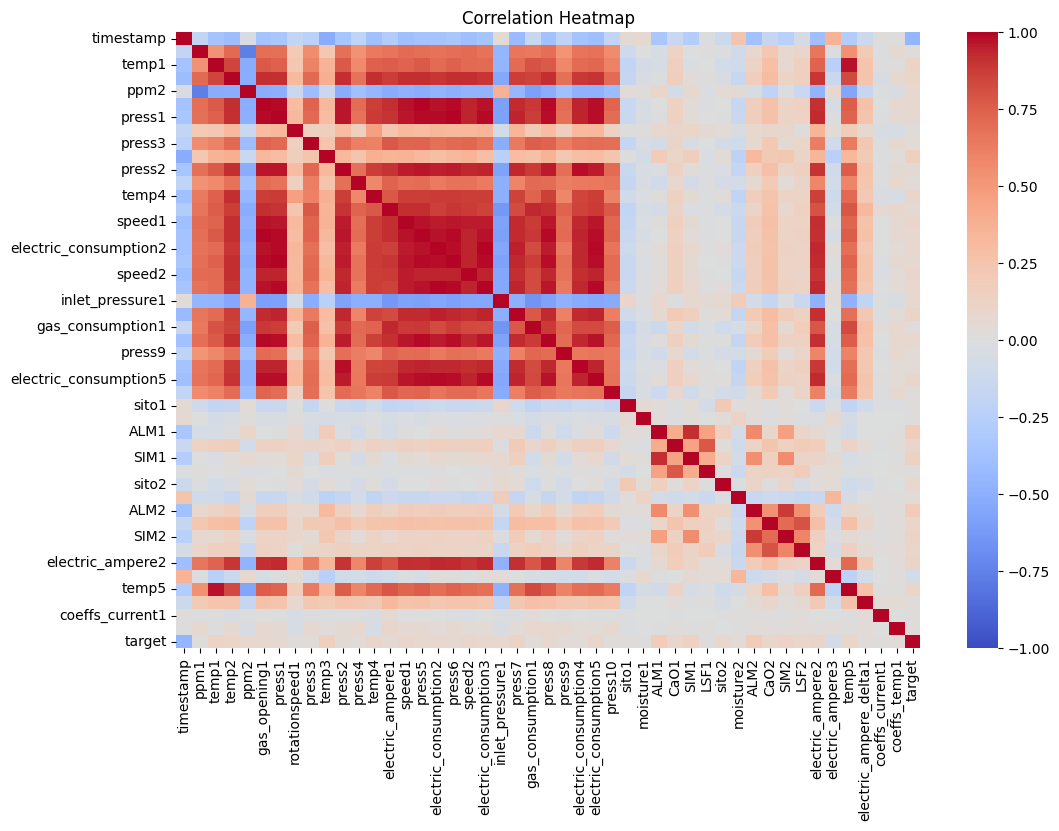

In [14]:

merged = merged.drop(columns=['Unnamed: 0', 'target_x', 'target_ffill'])

# Корреляция с target
correlation = merged.corr()['target'].sort_values(ascending=False)
print("Топ 10 признаков по корреляции с target:")
print(correlation.head(10))

# Тепловая карта корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(merged.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Выбираем топ-признаки
features = ['ALM2', 'ALM1', 'temp3', 'SIM1', 'temp1', 'SIM2', 'electric_ampere2', 'press7', 'CaO2']
X = merged[features]
y = merged['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


MAE: 0.0497, RMSE: 0.1031, R2: 0.9593


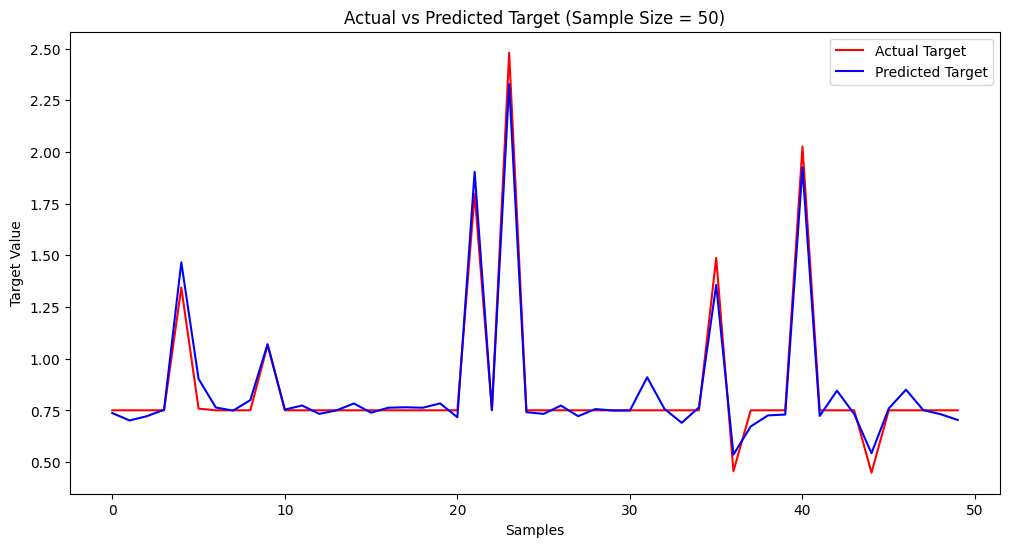

In [19]:
sample_size = 50
start_idx = 0

y_test_sample = y_test.values[start_idx:start_idx+sample_size]
y_pred_sample = y_pred[start_idx:start_idx+sample_size]

plt.figure(figsize=(12, 6))

plt.plot(y_test_sample, label="Actual Target", color="red")
plt.plot(y_pred_sample, label="Predicted Target", color="blue")

plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title(f"Actual vs Predicted Target (Sample Size = {sample_size})")
plt.legend()
plt.show()


In [20]:
# Создаем лаги для прогнозирования на 15 минут вперед
lag_steps = 15

features_with_lags = merged.copy()
for feature in features:
    features_with_lags[f"{feature}_lag"] = features_with_lags[feature].shift(lag_steps)

features_with_lags.dropna(inplace=True)

# Обновляем признаки и таргет
X_lag = features_with_lags[[f"{f}_lag" for f in features]]
y_lag = features_with_lags['target']

X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(X_lag, y_lag, test_size=0.2, random_state=42)

model_lag = XGBRegressor(random_state=42)
model_lag.fit(X_train_lag, y_train_lag)

y_pred_lag = model_lag.predict(X_test_lag)

mae_lag = mean_absolute_error(y_test_lag, y_pred_lag)
mse_lag = mean_squared_error(y_test_lag, y_pred_lag)
rmse_lag = np.sqrt(mse_lag)
r2_lag = r2_score(y_test_lag, y_pred_lag)

print(f"15-Minute Forecast Metrics: MAE: {mae_lag:.4f}, RMSE: {rmse_lag:.4f}, R2: {r2_lag:.4f}")


15-Minute Forecast Metrics: MAE: 0.0488, RMSE: 0.1110, R2: 0.9504


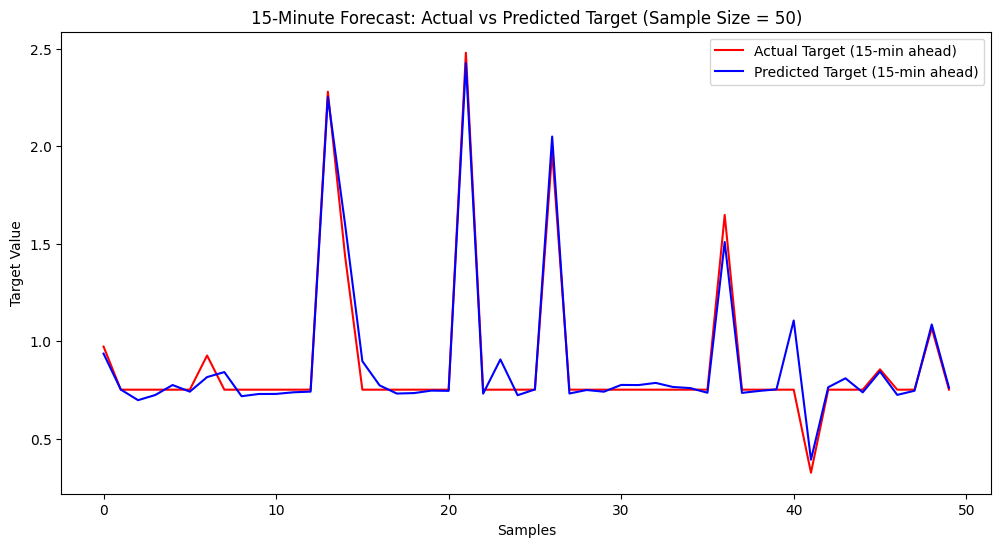

In [22]:
sample_size = 50
y_test_lag_sample = y_test_lag.values[:sample_size]
y_pred_lag_sample = y_pred_lag[:sample_size]

plt.figure(figsize=(12, 6))

plt.plot(y_test_lag_sample, label="Actual Target (15-min ahead)", color="red")

plt.plot(y_pred_lag_sample, label="Predicted Target (15-min ahead)", color="blue")

plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("15-Minute Forecast: Actual vs Predicted Target (Sample Size = 50)")
plt.legend()
plt.show()


In [23]:
# Добавляем сдвиг для gas_consumption1 на 150 шагов
shift_steps = 150
merged['gas_consumption1_lag'] = merged['gas_consumption1'].shift(shift_steps)

merged_lag_gas = merged.dropna(subset=['gas_consumption1_lag'])

X_gas_lag = merged_lag_gas[features + ['gas_consumption1_lag']]
y_gas_lag = merged_lag_gas['target']

X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X_gas_lag, y_gas_lag, test_size=0.2, random_state=42)

model_gas_lag = XGBRegressor(random_state=42)
model_gas_lag.fit(X_train_gas, y_train_gas)

y_pred_gas_lag = model_gas_lag.predict(X_test_gas)

mae_gas_lag = mean_absolute_error(y_test_gas, y_pred_gas_lag)
mse_gas_lag = mean_squared_error(y_test_gas, y_pred_gas_lag)
rmse_gas_lag = np.sqrt(mse_gas_lag)
r2_gas_lag = r2_score(y_test_gas, y_pred_gas_lag)

print(f"150-Step Forecast with Gas Consumption Lag: MAE: {mae_gas_lag:.4f}, RMSE: {rmse_gas_lag:.4f}, R2: {r2_gas_lag:.4f}")


150-Step Forecast with Gas Consumption Lag: MAE: 0.0442, RMSE: 0.0933, R2: 0.9652


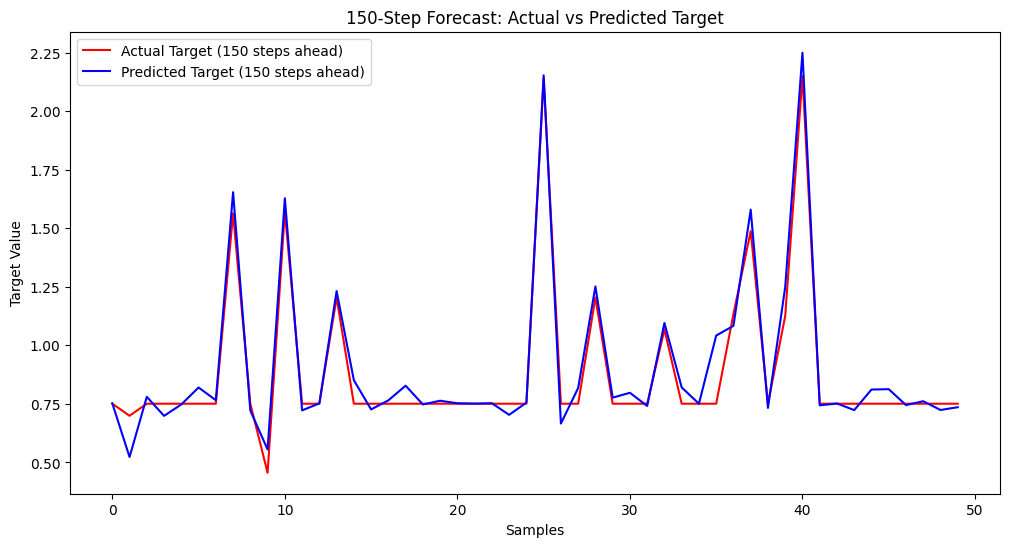

In [24]:
# Визуализация прогноза с изменением gas_consumption1 на 150 шагов
plt.figure(figsize=(12, 6))

plt.plot(y_test_gas.values[:50], label="Actual Target (150 steps ahead)", color="red")

plt.plot(y_pred_gas_lag[:50], label="Predicted Target (150 steps ahead)", color="blue")

plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("150-Step Forecast: Actual vs Predicted Target")
plt.legend()
plt.show()
